In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats
import math
import os
import funciones

In [3]:
desc_2 = os.path.join('Proyecto Herramienta para monitoreo de la calidad de datos', '2. Datos', 'planta_2', 'planta_2_descripcion.csv')
desc_planta_2 = pd.read_csv(desc_2)
desc_planta_2

,name,unit,type_var,periodicity,critical_max_value,warning_max_value,warning_min_value,critical_min_value
0,Flujo Afluente PTAR,L/s,caudal,1 minutes,5500.0,5000.0,200.0,0.0
1,Flujo Cámara de contacto 1,L/s,caudal,1 minutes,NaN,NaN,NaN,NaN
2,Flujo Cámara de contacto 2,L/s,caudal,1 minutes,NaN,NaN,NaN,NaN
3,Flujo Alimentación Digestor 1,L/s,caudal,1 minutes,NaN,NaN,NaN,NaN
4,Flujo Alimentación Digestor 2,L/s,caudal,1 minutes,NaN,NaN,NaN,NaN
5,Flujo Alimentación Digestor 3,L/s,caudal,1 minutes,NaN,NaN,NaN,NaN
6,Nivel Pozo WAS,m,nivel,1 minutes,NaN,NaN,NaN,NaN
7,Flujo Salida de Lodo Sedimentador Secundario 3,L/s,caudal,1 minutes,NaN,NaN,NaN,0.0
8,Flujo Aire Reactor 1,L/s,flujo-aire-soplador,1 minutes,NaN,NaN,NaN,NaN
9,Flujo Aire Reactor 2,L/s,flujo-aire-soplador,1 minutes,NaN,NaN,NaN,NaN


In [4]:
planta_2 = os.path.join('Proyecto Herramienta para monitoreo de la calidad de datos', '2. Datos', 'planta_2', 'planta_2_datos.csv')
df_planta_2 = pd.read_csv(planta_2)
df_planta_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440471 entries, 0 to 440470
Data columns (total 15 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   date_time                                       440471 non-null  object 
 1   Flujo Cámara de contacto 1                      413476 non-null  float64
 2   Flujo Salida de Lodo Sedimentador Secundario 3  320223 non-null  float64
 3   Flujo Aire Reactor 2                            369901 non-null  float64
 4   test                                            3 non-null       float64
 5   Nivel Pozo WAS                                  320190 non-null  float64
 6   OD Reactor 2                                    115736 non-null  float64
 7   Flujo Afluente PTAR                             423581 non-null  float64
 8   Flujo Alimentación Digestor 1                   195755 non-null  float64
 9   Flujo Alimentación Digesto

In [5]:
df_planta_2['date_time'] = pd.to_datetime(df_planta_2['date_time'])

df_planta_2.dropna(axis=1, how='all', inplace=True)
df_planta_2.drop(columns=['test'], inplace=True)

In [6]:
df_planta_2.describe()

,date_time,Flujo Cámara de contacto 1,Flujo Salida de Lodo Sedimentador Secundario 3,Flujo Aire Reactor 2,Nivel Pozo WAS,OD Reactor 2,Flujo Afluente PTAR,Flujo Alimentación Digestor 1,Flujo Alimentación Digestor 2,Flujo Alimentación Digestor 3,Flujo Aire Reactor 1,Flujo Aire Reactor 3,OD Reactor 1,Flujo Cámara de contacto 2
count,440471,413476.000000,320223.000000,369901.000000,320190.000000,115736.0,423581.000000,195755.000000,182100.000000,301633.000000,68814.000000,320052.000000,121056.000000,413563.000000
mean,2025-02-04 12:30:42.207091968,1707.055478,130.546309,188.470481,2.946176,0.0,2732.298090,11.284186,8.455228,5.779215,4805.031407,7411.837532,3.483106,1682.810497
min,2024-08-12 16:32:00,303.000000,0.000000,-4.000000,0.000000,0.0,0.000000,-0.273000,-0.309000,0.000000,0.000000,-6.000000,0.116000,-3.500000
25%,2024-10-29 04:55:30,1369.500000,125.050000,0.000000,2.650000,0.0,2039.799927,7.115000,0.003000,0.012200,128.400000,7840.800000,1.758000,1345.000000
50%,2025-02-10 06:26:00,1730.500000,129.300000,197.000000,2.873900,0.0,2821.000000,14.202000,11.440000,0.073200,8369.000000,8143.000000,3.282000,1738.000000
75%,2025-05-11 05:18:30,2011.000000,138.649994,307.200000,3.150000,0.0,3356.500000,16.070000,12.006000,14.701000,8888.850000,8387.000000,4.674000,1970.000000
max,2025-08-09 23:59:00,3817.000000,254.100006,2379.000000,6.300000,0.0,5005.699707,30.711000,31.500000,40.600000,9006.000000,9006.000000,23.000000,4997.000000
std,NaN,493.651228,11.846629,165.746660,0.489621,0.0,945.847500,6.444520,5.789601,7.224406,4267.435405,2385.157119,2.326163,486.551125


In [7]:
df_planta_2['OD Reactor 2'] = df_planta_2['OD Reactor 2'].astype(bool)

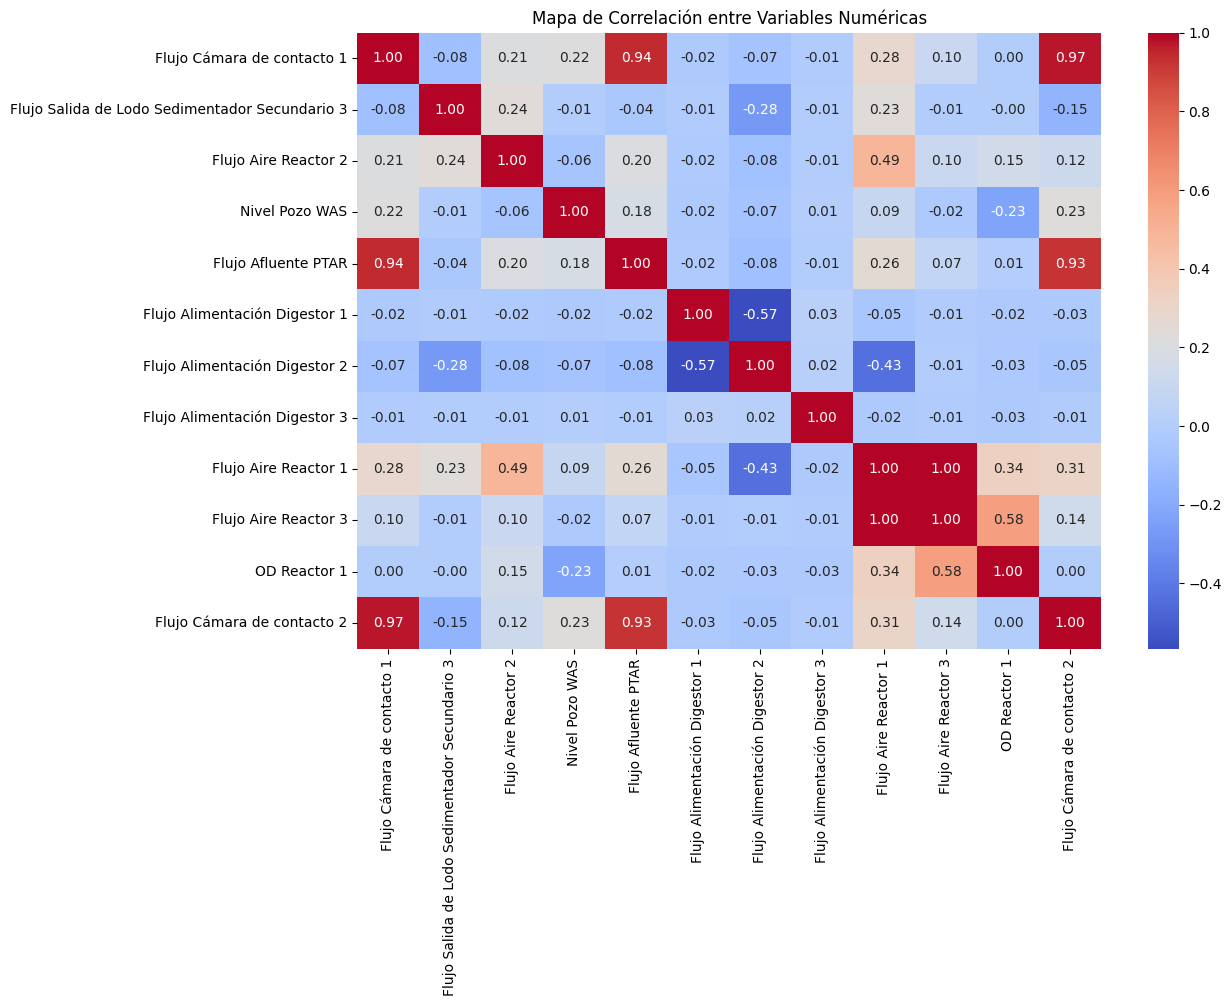

In [8]:
funciones.plot_corr(df_planta_2)

Graficando Flujo Cámara de contacto 1 (límites: wmin=None, wmax=None, cmin=None, cmax=None)


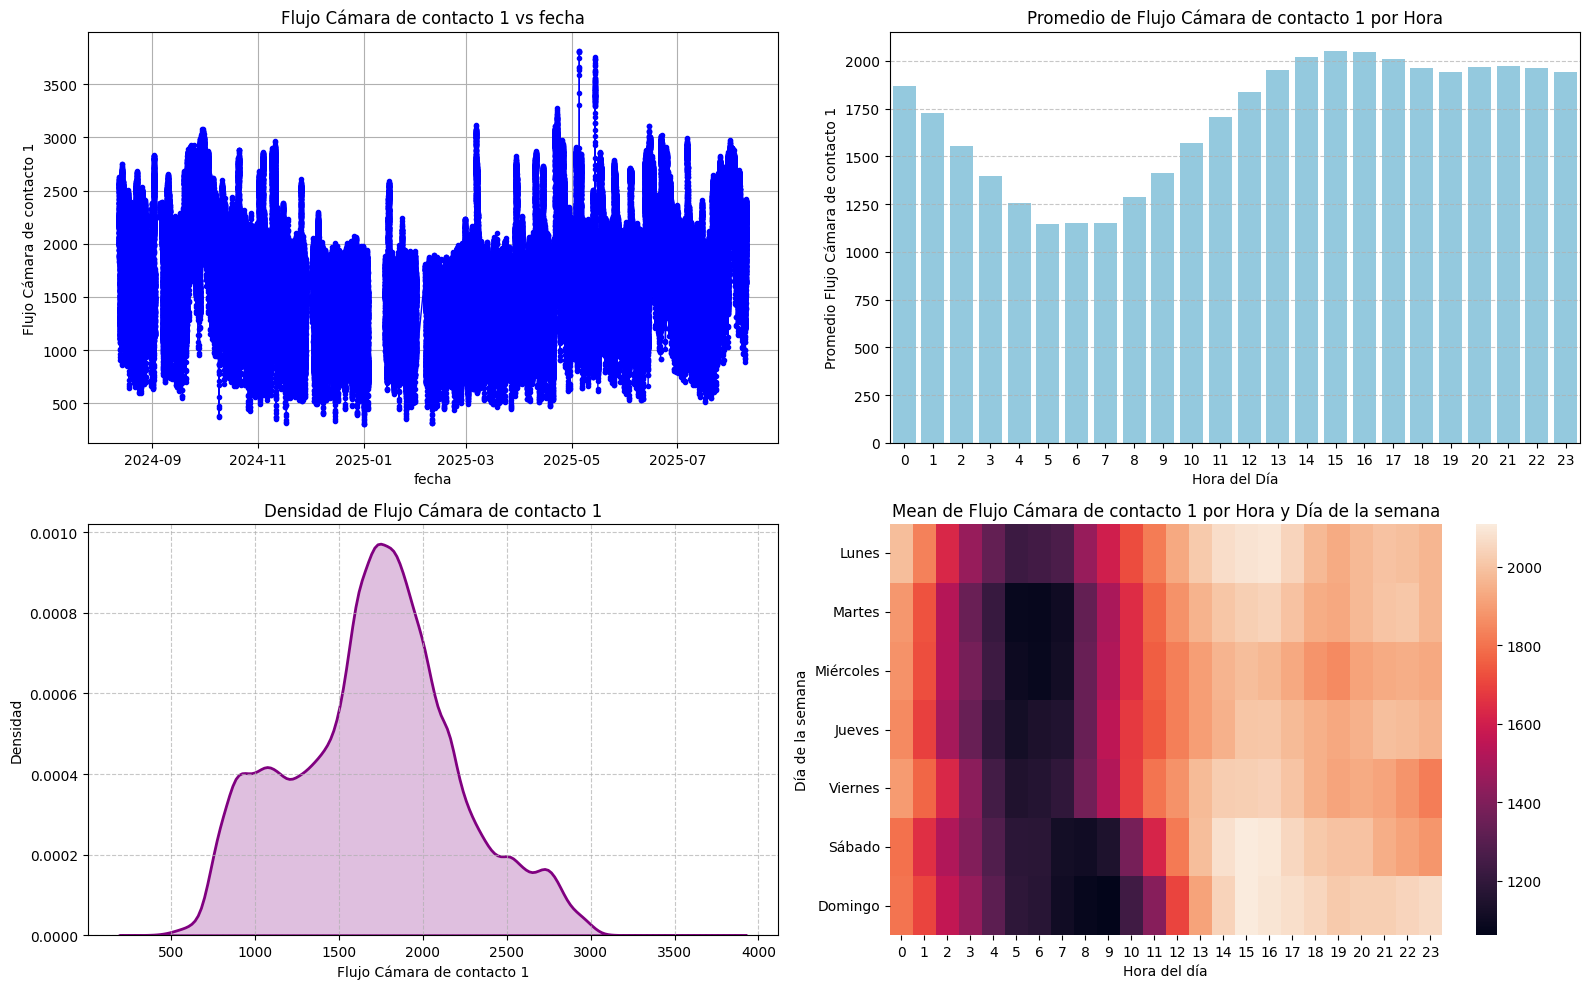

Graficando Flujo Salida de Lodo Sedimentador Secundario 3 (límites: wmin=None, wmax=None, cmin=0.0, cmax=None)


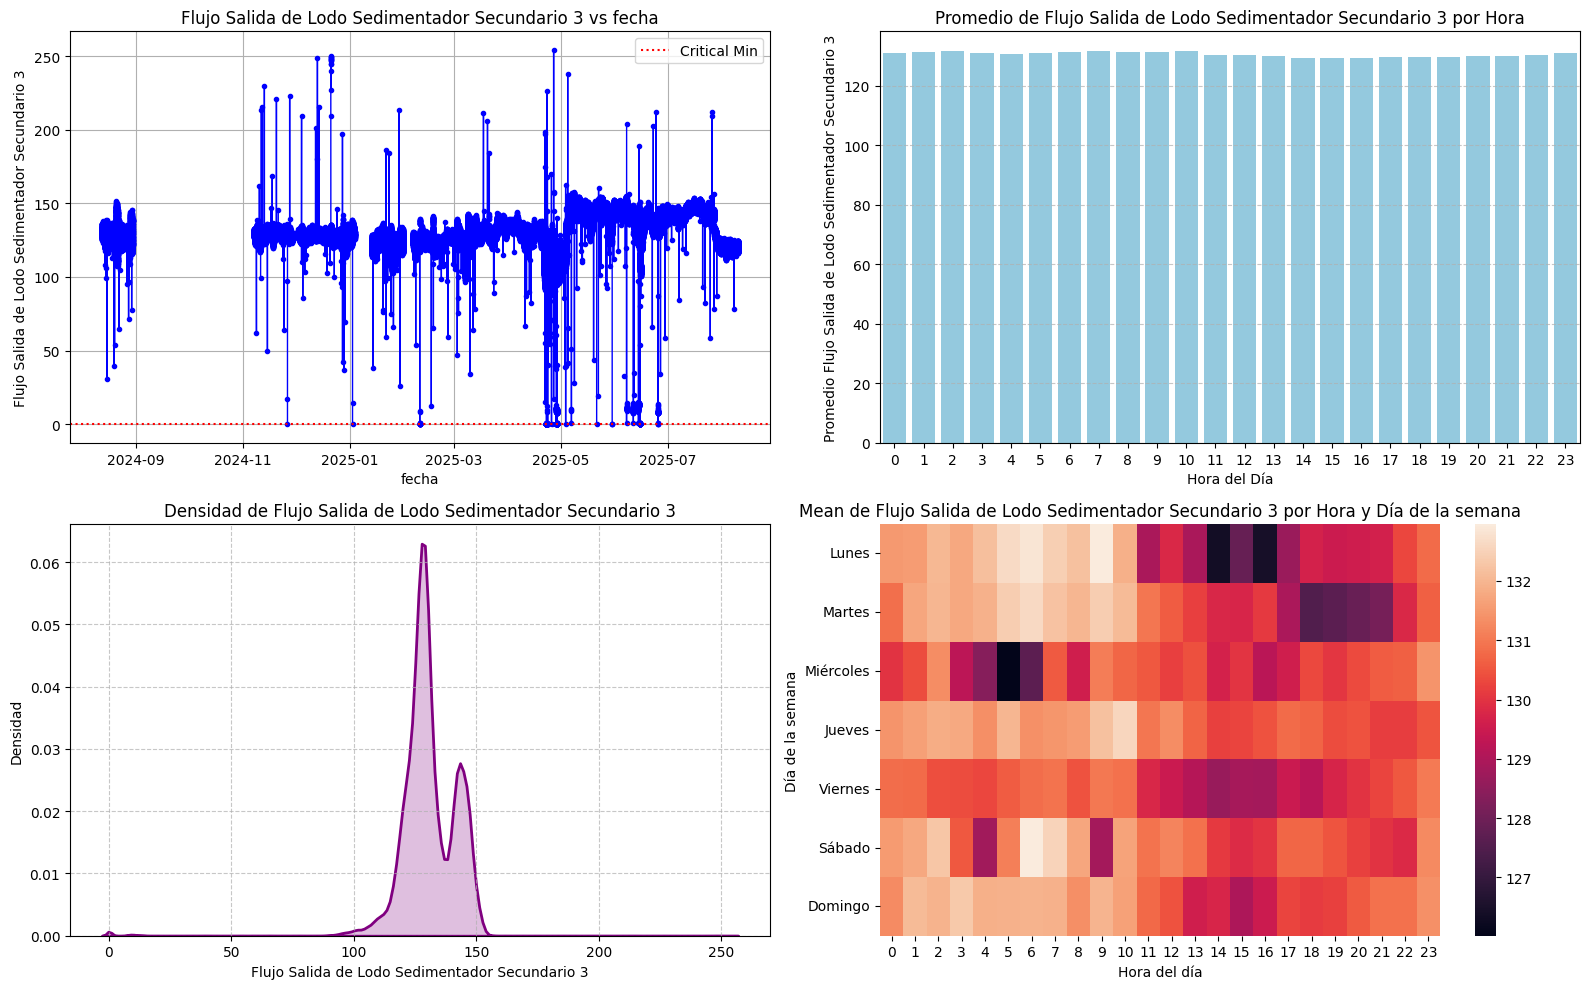

Graficando Flujo Aire Reactor 2 (límites: wmin=None, wmax=None, cmin=None, cmax=None)


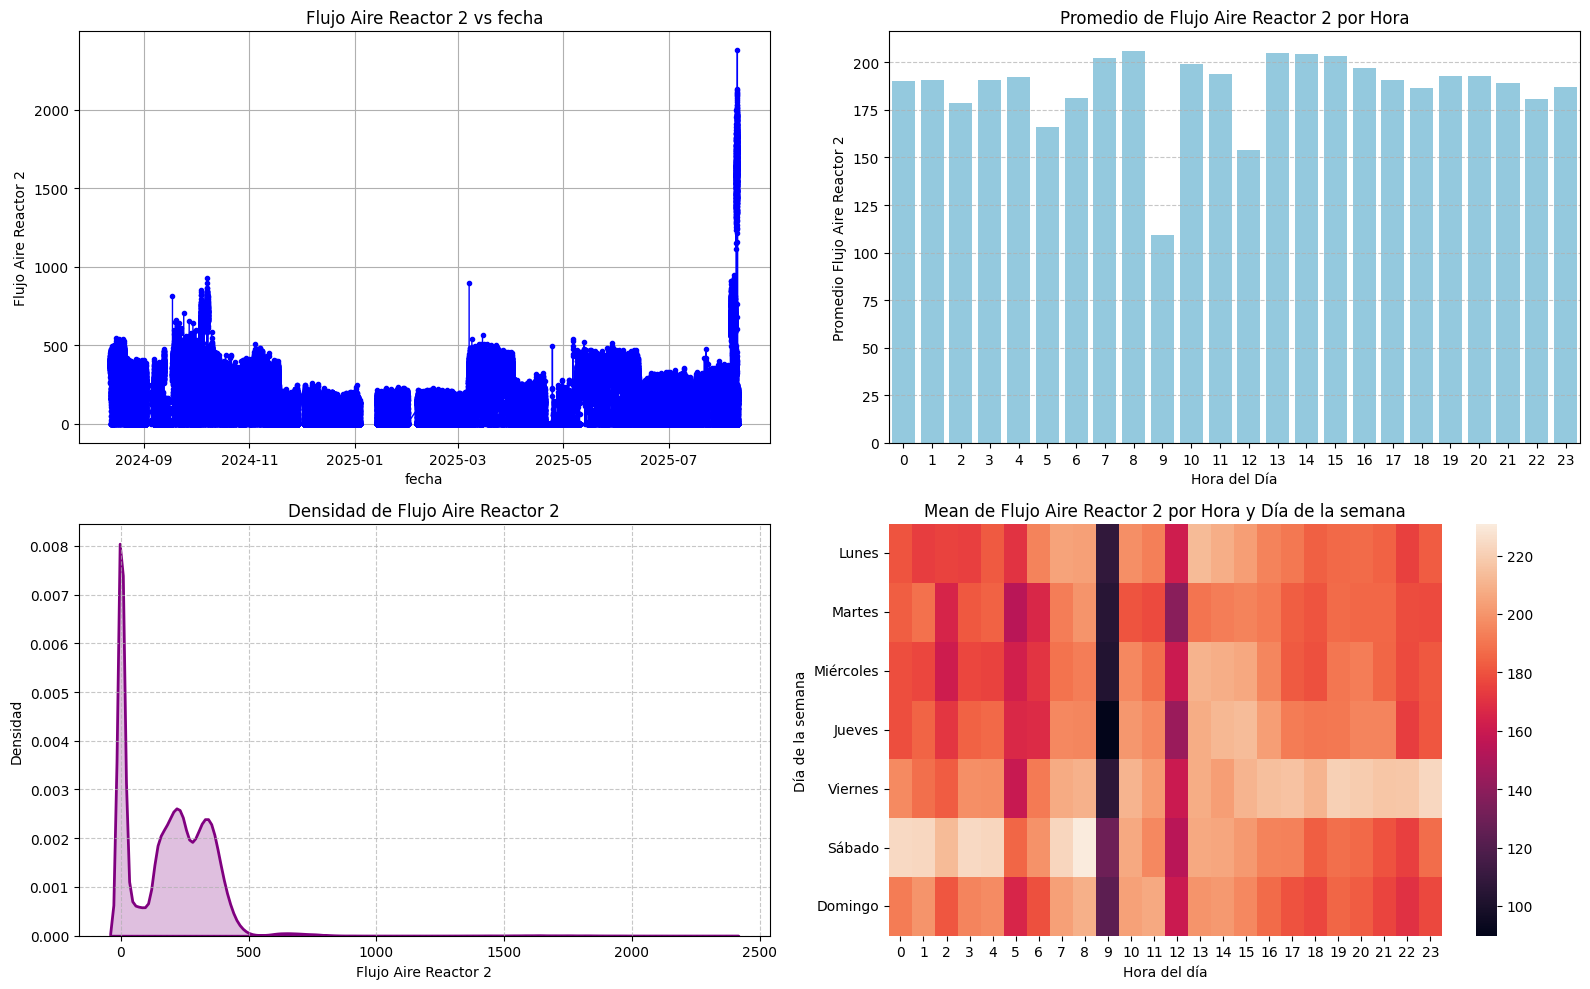

Graficando Nivel Pozo WAS (límites: wmin=None, wmax=None, cmin=None, cmax=None)


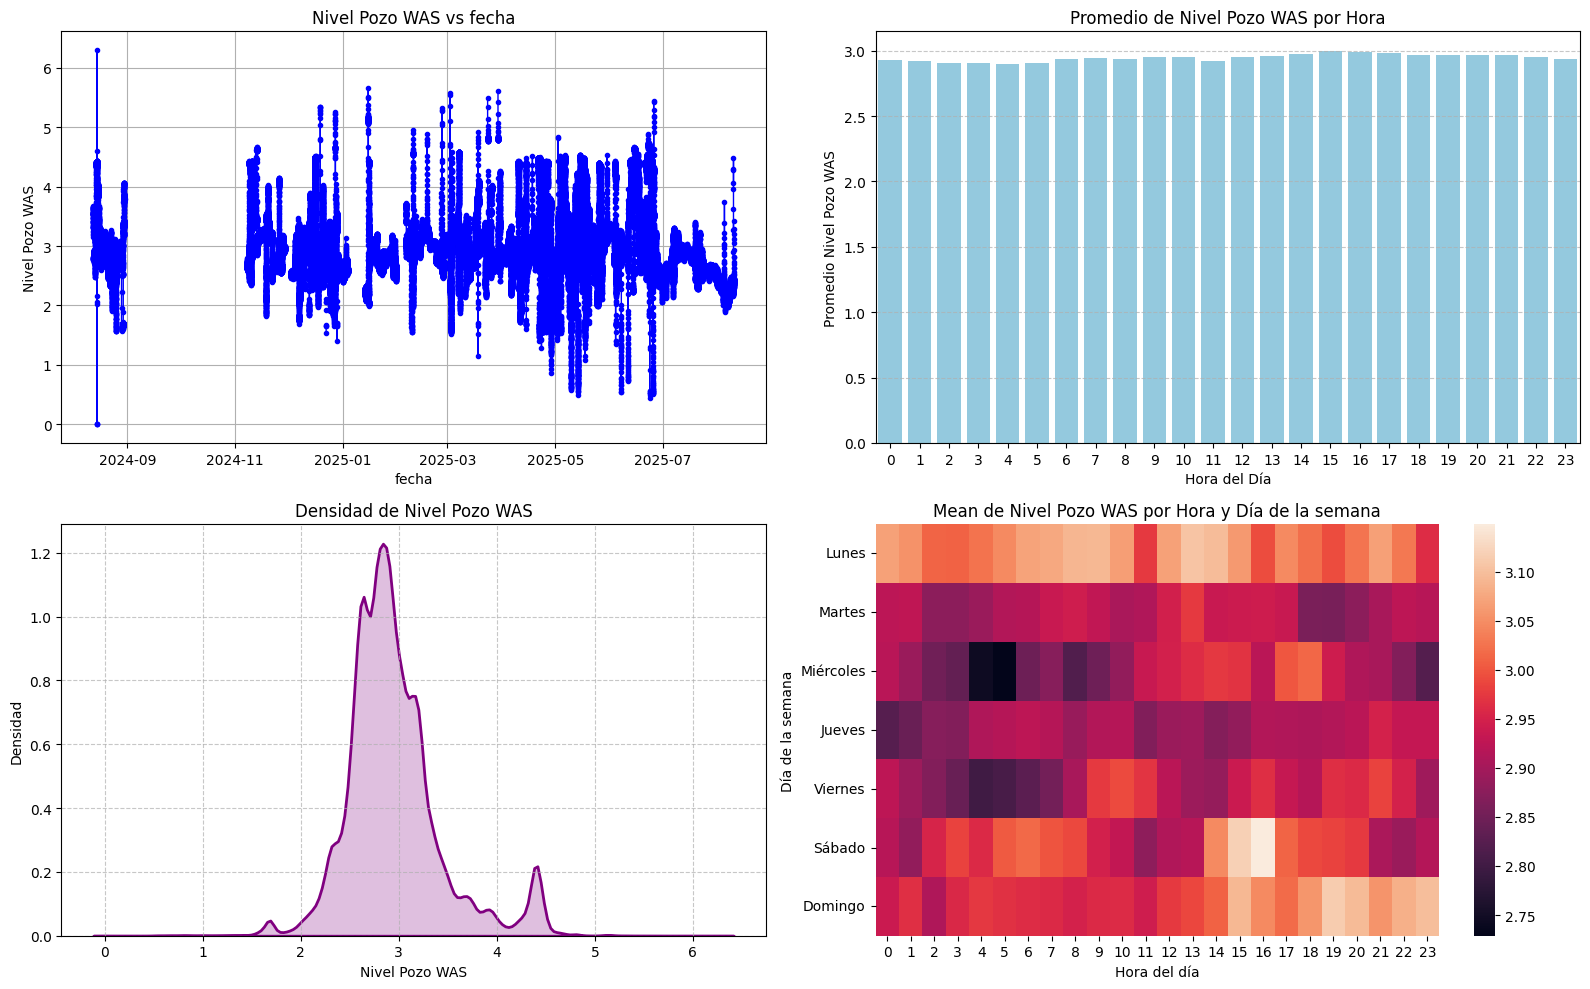

Graficando Flujo Afluente PTAR (límites: wmin=200.0, wmax=5000.0, cmin=0.0, cmax=5500.0)


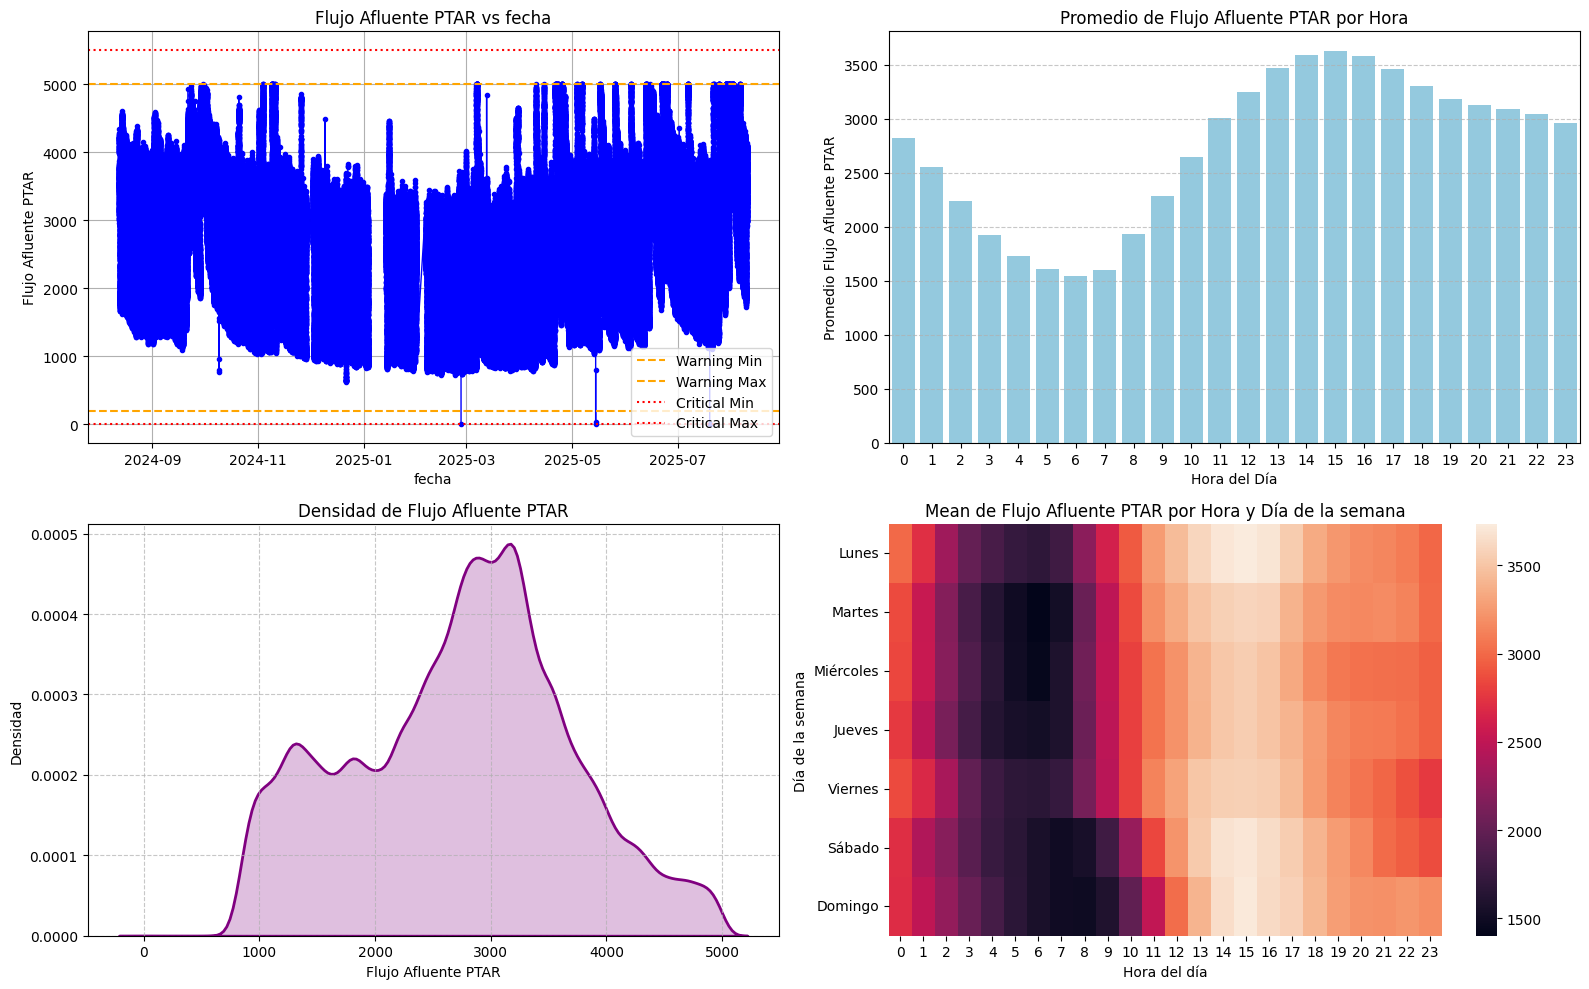

Graficando Flujo Alimentación Digestor 1 (límites: wmin=None, wmax=None, cmin=None, cmax=None)


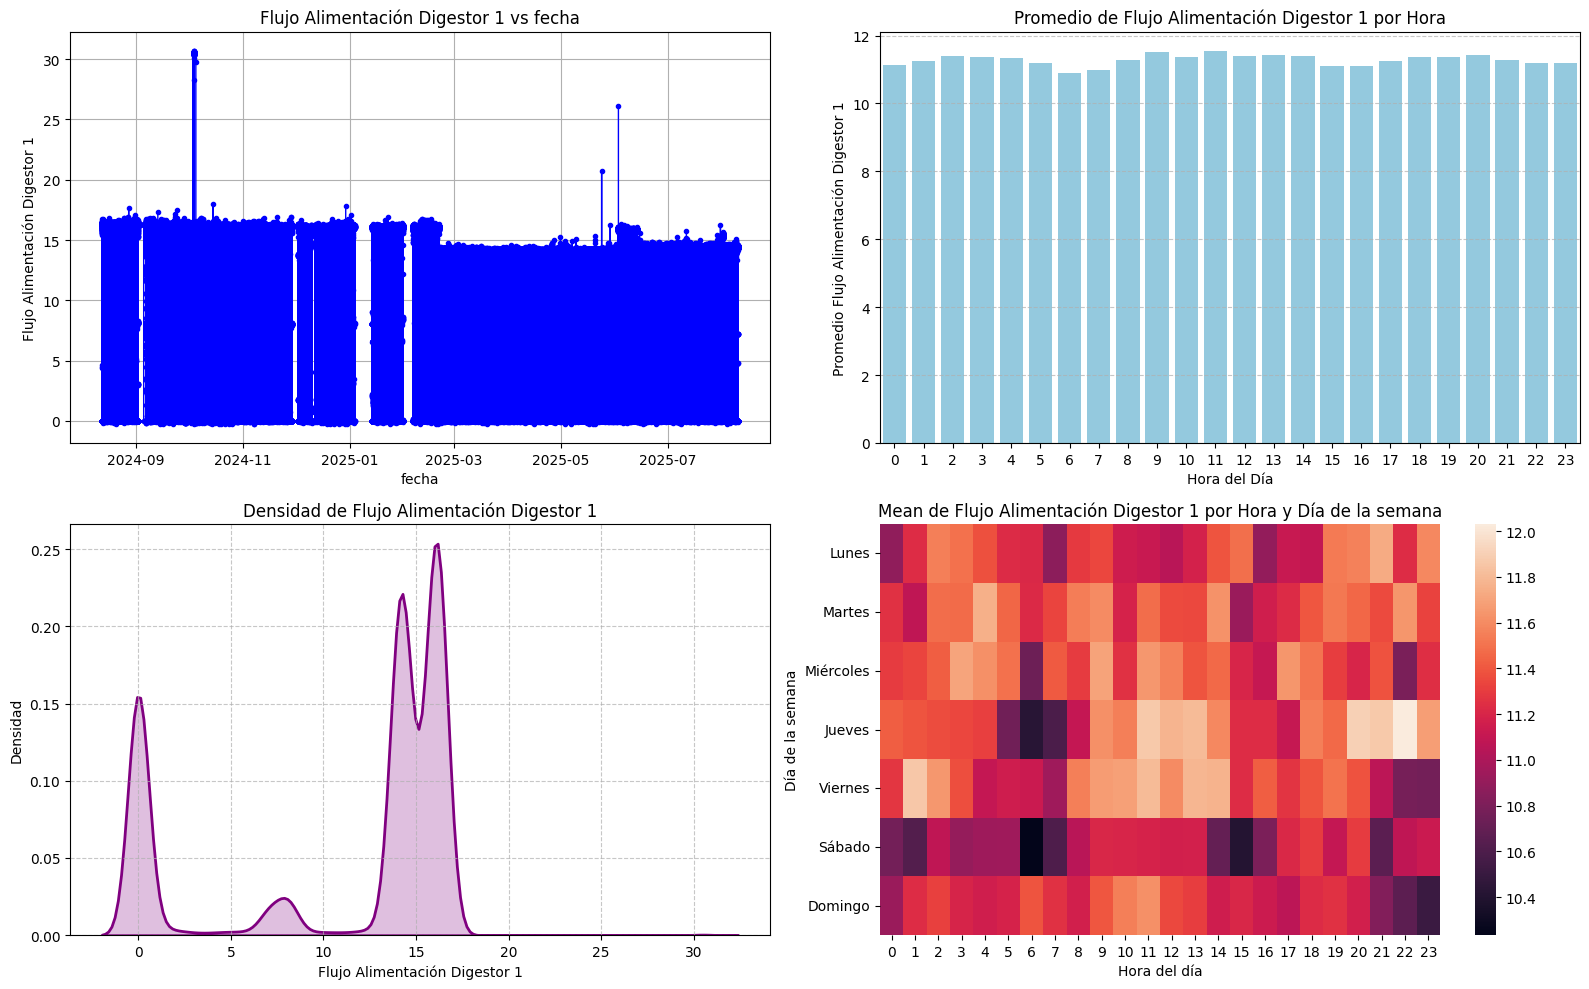

Graficando Flujo Alimentación Digestor 2 (límites: wmin=None, wmax=None, cmin=None, cmax=None)


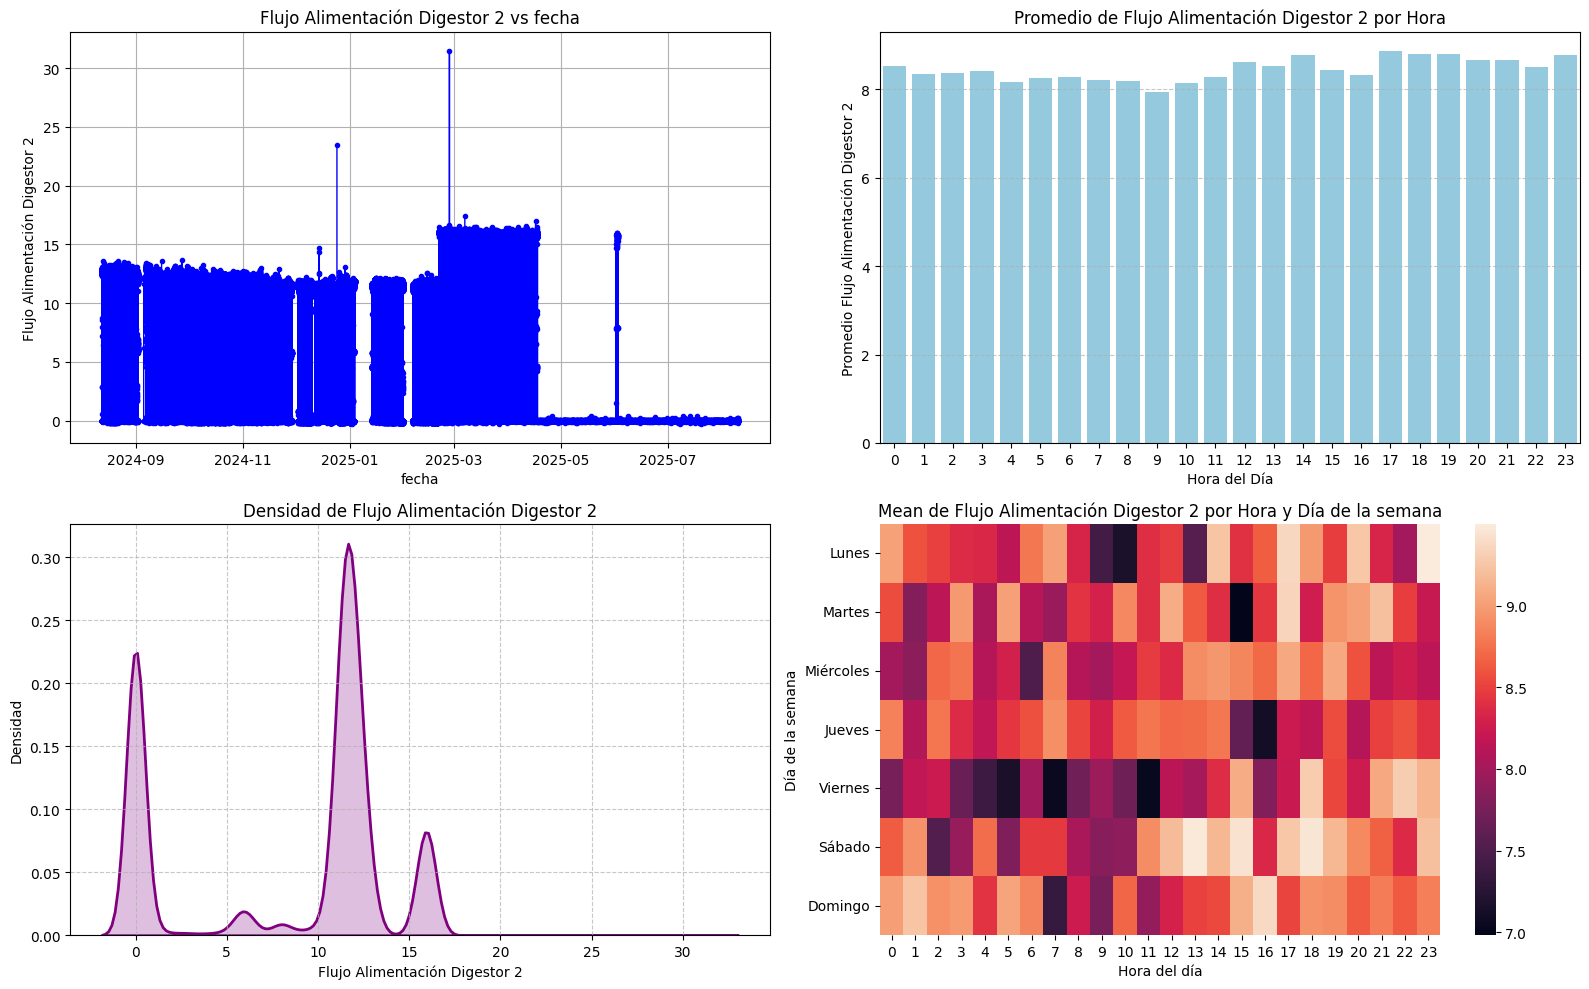

Graficando Flujo Alimentación Digestor 3 (límites: wmin=None, wmax=None, cmin=None, cmax=None)


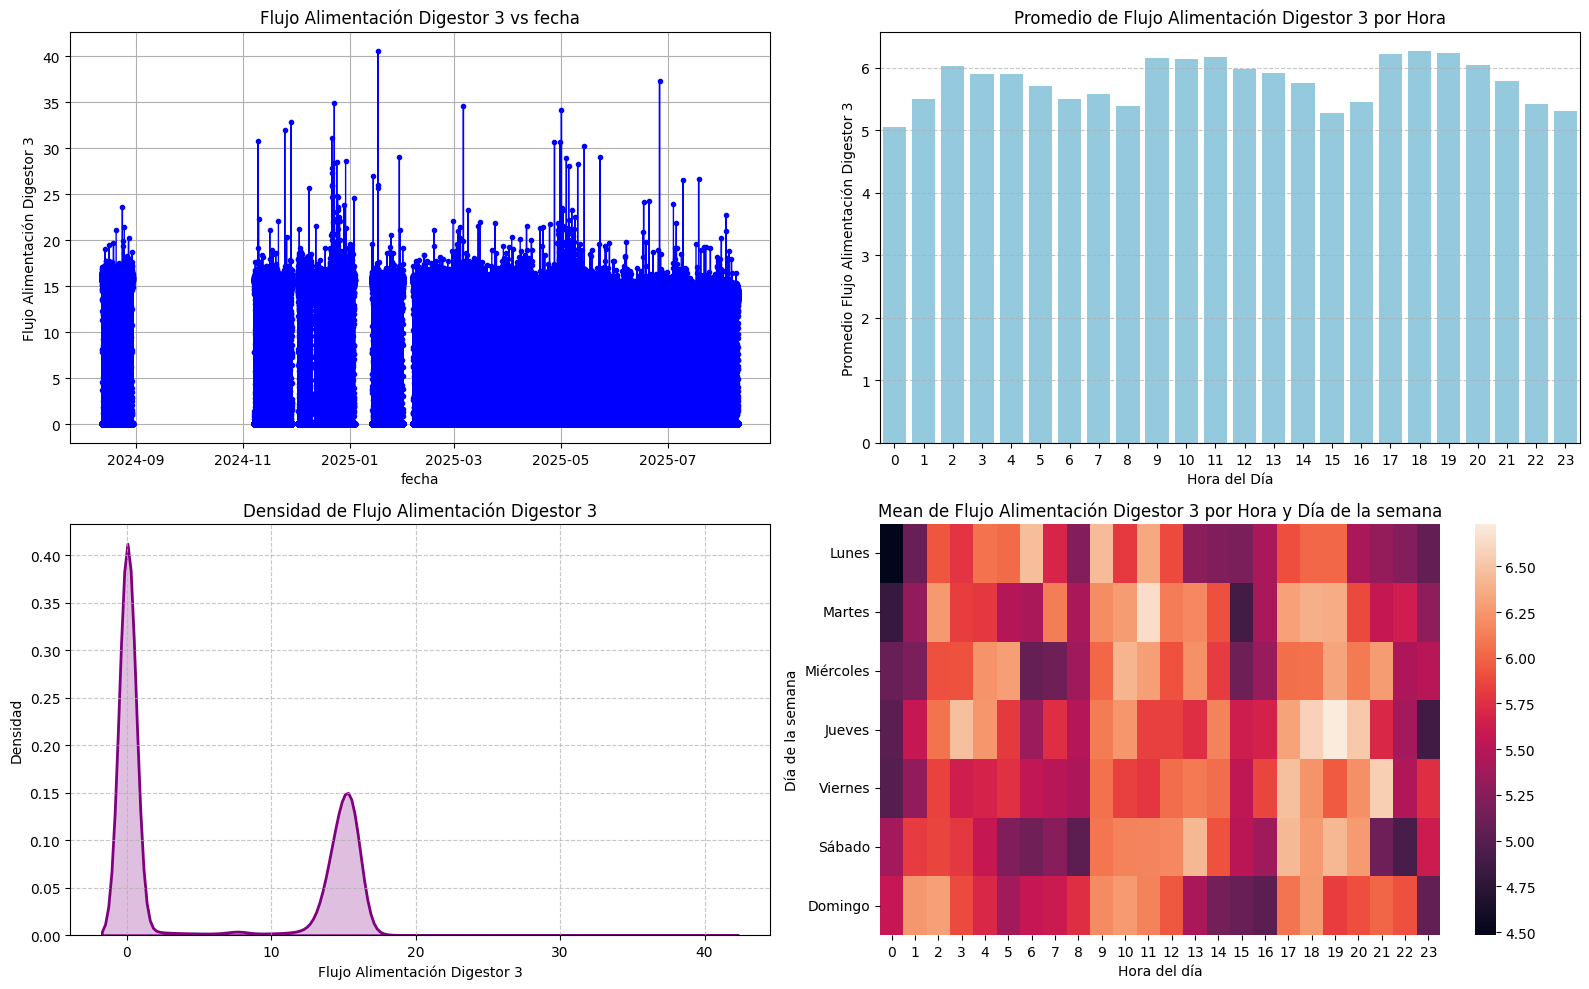

Graficando Flujo Aire Reactor 1 (límites: wmin=None, wmax=None, cmin=None, cmax=None)


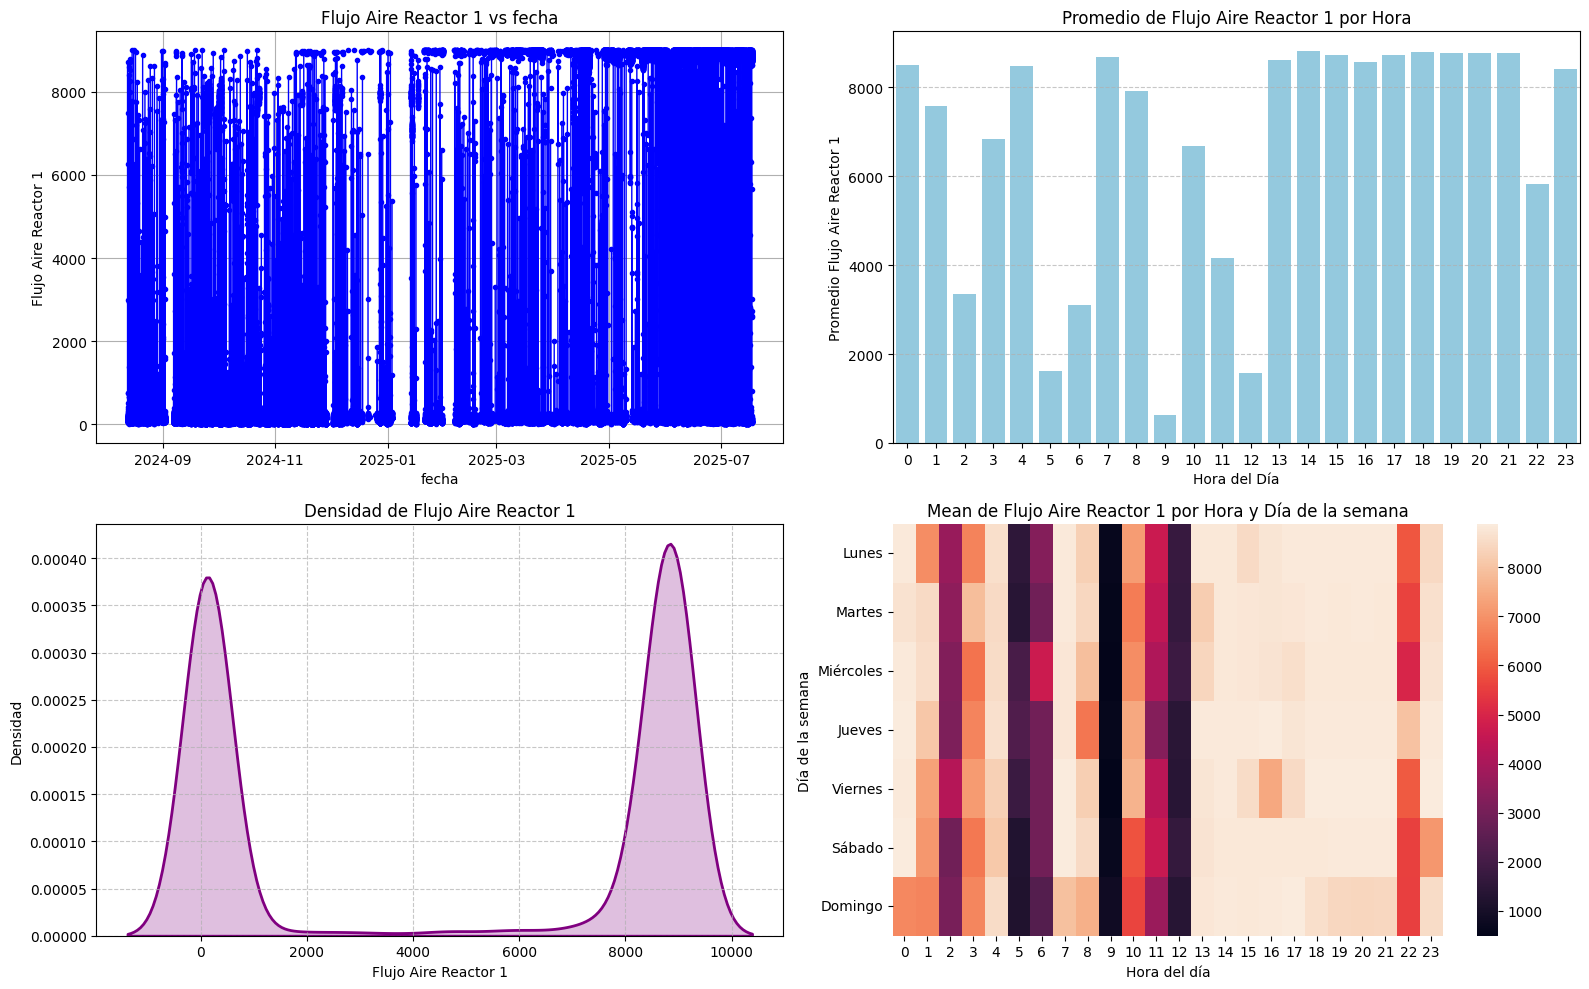

Graficando Flujo Aire Reactor 3 (límites: wmin=None, wmax=None, cmin=None, cmax=None)


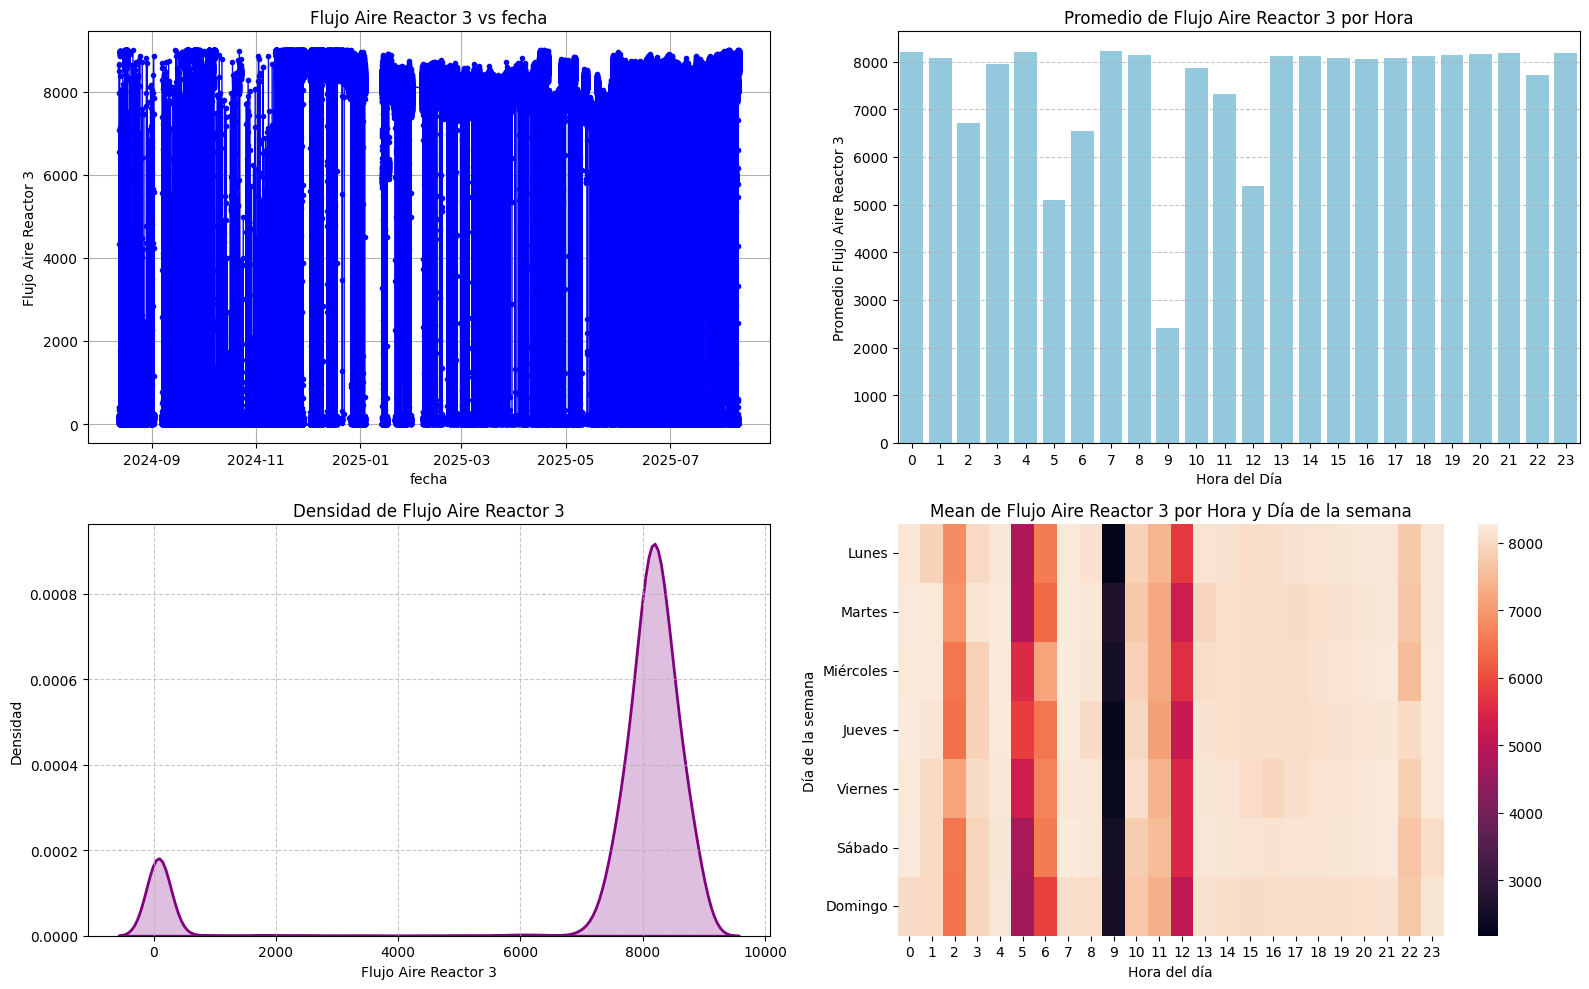

Graficando OD Reactor 1 (límites: wmin=None, wmax=7.5, cmin=None, cmax=9.0)


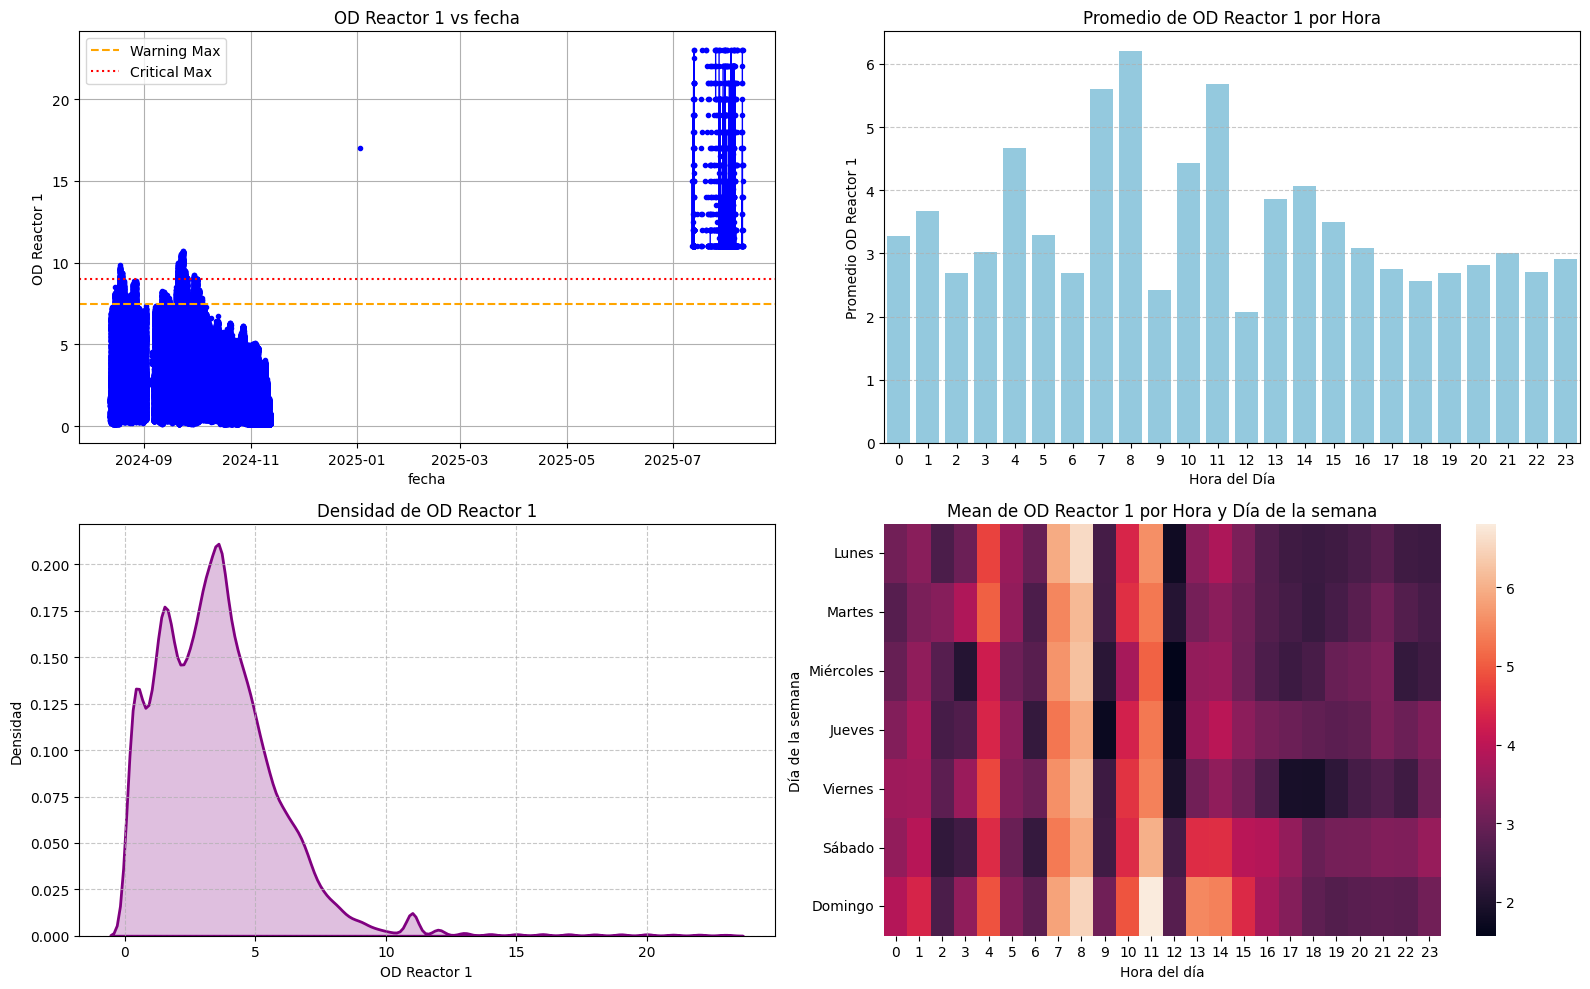

Graficando Flujo Cámara de contacto 2 (límites: wmin=None, wmax=None, cmin=None, cmax=None)


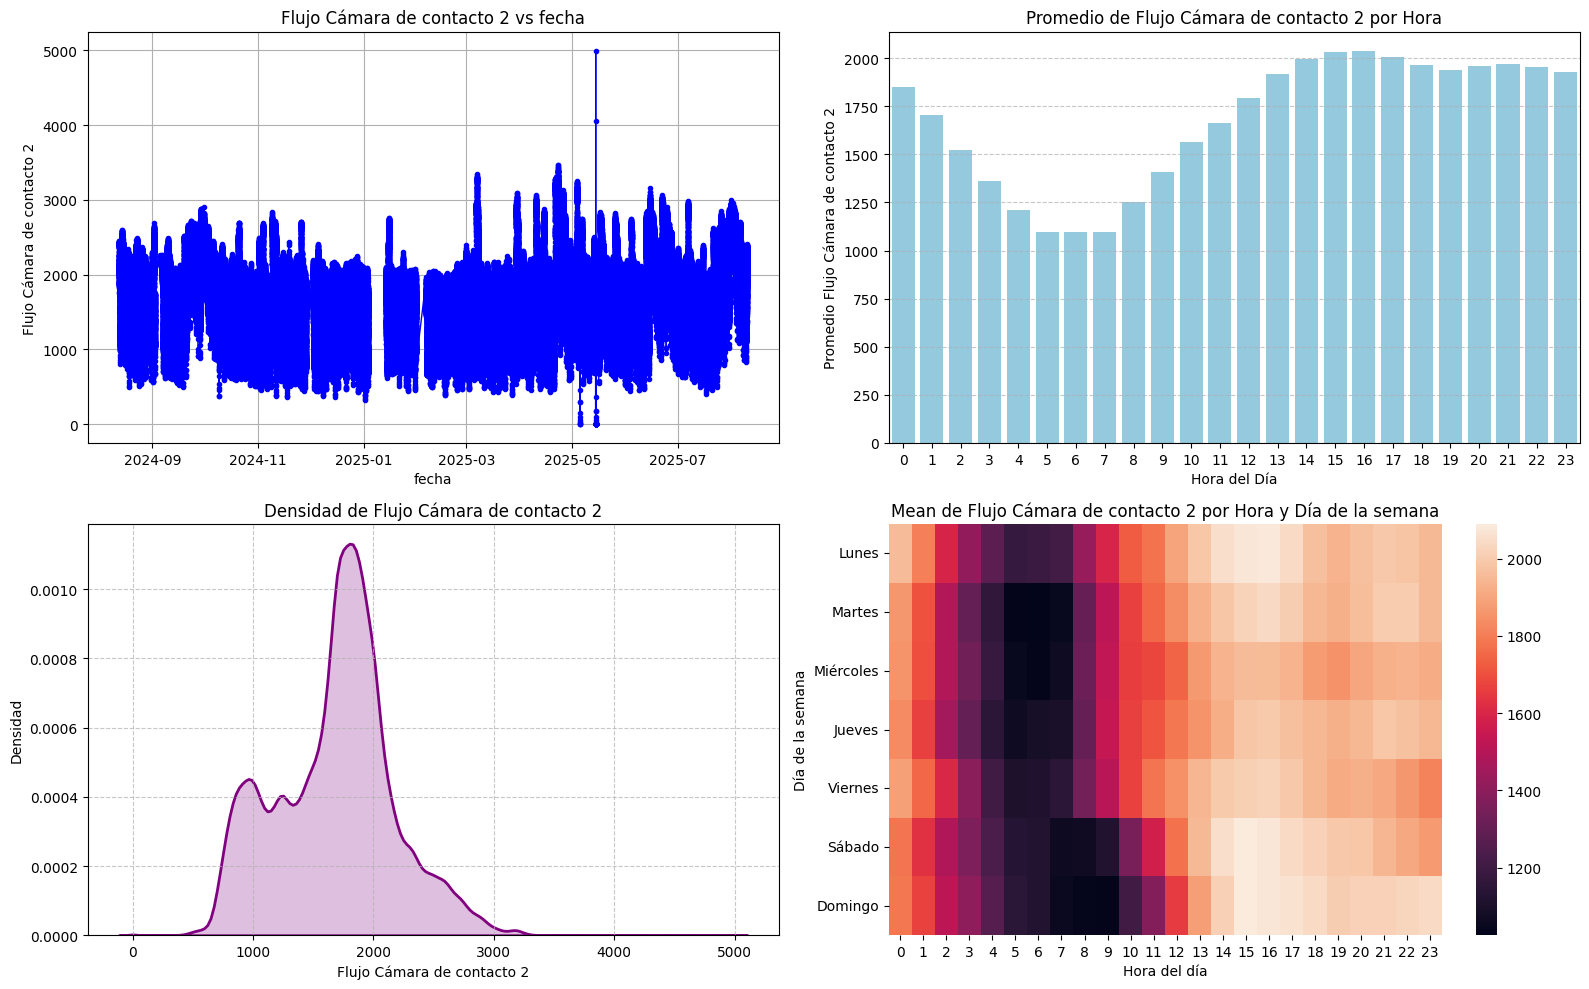

In [9]:
# Graficar todas las variables numéricas con límites si existen en desc_planta_2
num_cols = df_planta_2.select_dtypes(include=[np.number]).columns
for col in num_cols:
    wmin, wmax, cmin, cmax = funciones.get_limits(desc_planta_2, col)
    print(f'Graficando {col} (límites: wmin={wmin}, wmax={wmax}, cmin={cmin}, cmax={cmax})')
    funciones.plot_all(df_planta_2, col, warning_min=wmin, warning_max=wmax, critical_min=cmin, critical_max=cmax)

In [10]:
df_eval, resumen = funciones.evaluar_estados(df_planta_2, desc_planta_2)
resumen

estado,advertencia_max,advertencia_min,critico_max,ok,sin_dato,total,%_advertencia_max,%_advertencia_min,%_critico_max,%_ok,%_sin_dato
name,,,,,,,,,,,
Flujo Afluente PTAR,127,4,0,423450,16890,440471,0.03,0.0,0.00,96.14,3.83
Flujo Aire Reactor 1,0,0,0,68814,371657,440471,0.00,0.0,0.00,15.62,84.38
Flujo Aire Reactor 2,0,0,0,369901,70570,440471,0.00,0.0,0.00,83.98,16.02
Flujo Aire Reactor 3,0,0,0,320052,120419,440471,0.00,0.0,0.00,72.66,27.34
Flujo Alimentación Digestor 1,0,0,0,195755,244716,440471,0.00,0.0,0.00,44.44,55.56
Flujo Alimentación Digestor 2,0,0,0,182100,258371,440471,0.00,0.0,0.00,41.34,58.66
Flujo Alimentación Digestor 3,0,0,0,301633,138838,440471,0.00,0.0,0.00,68.48,31.52
Flujo Cámara de contacto 1,0,0,0,413476,26995,440471,0.00,0.0,0.00,93.87,6.13
Flujo Cámara de contacto 2,0,0,0,413563,26908,440471,0.00,0.0,0.00,93.89,6.11


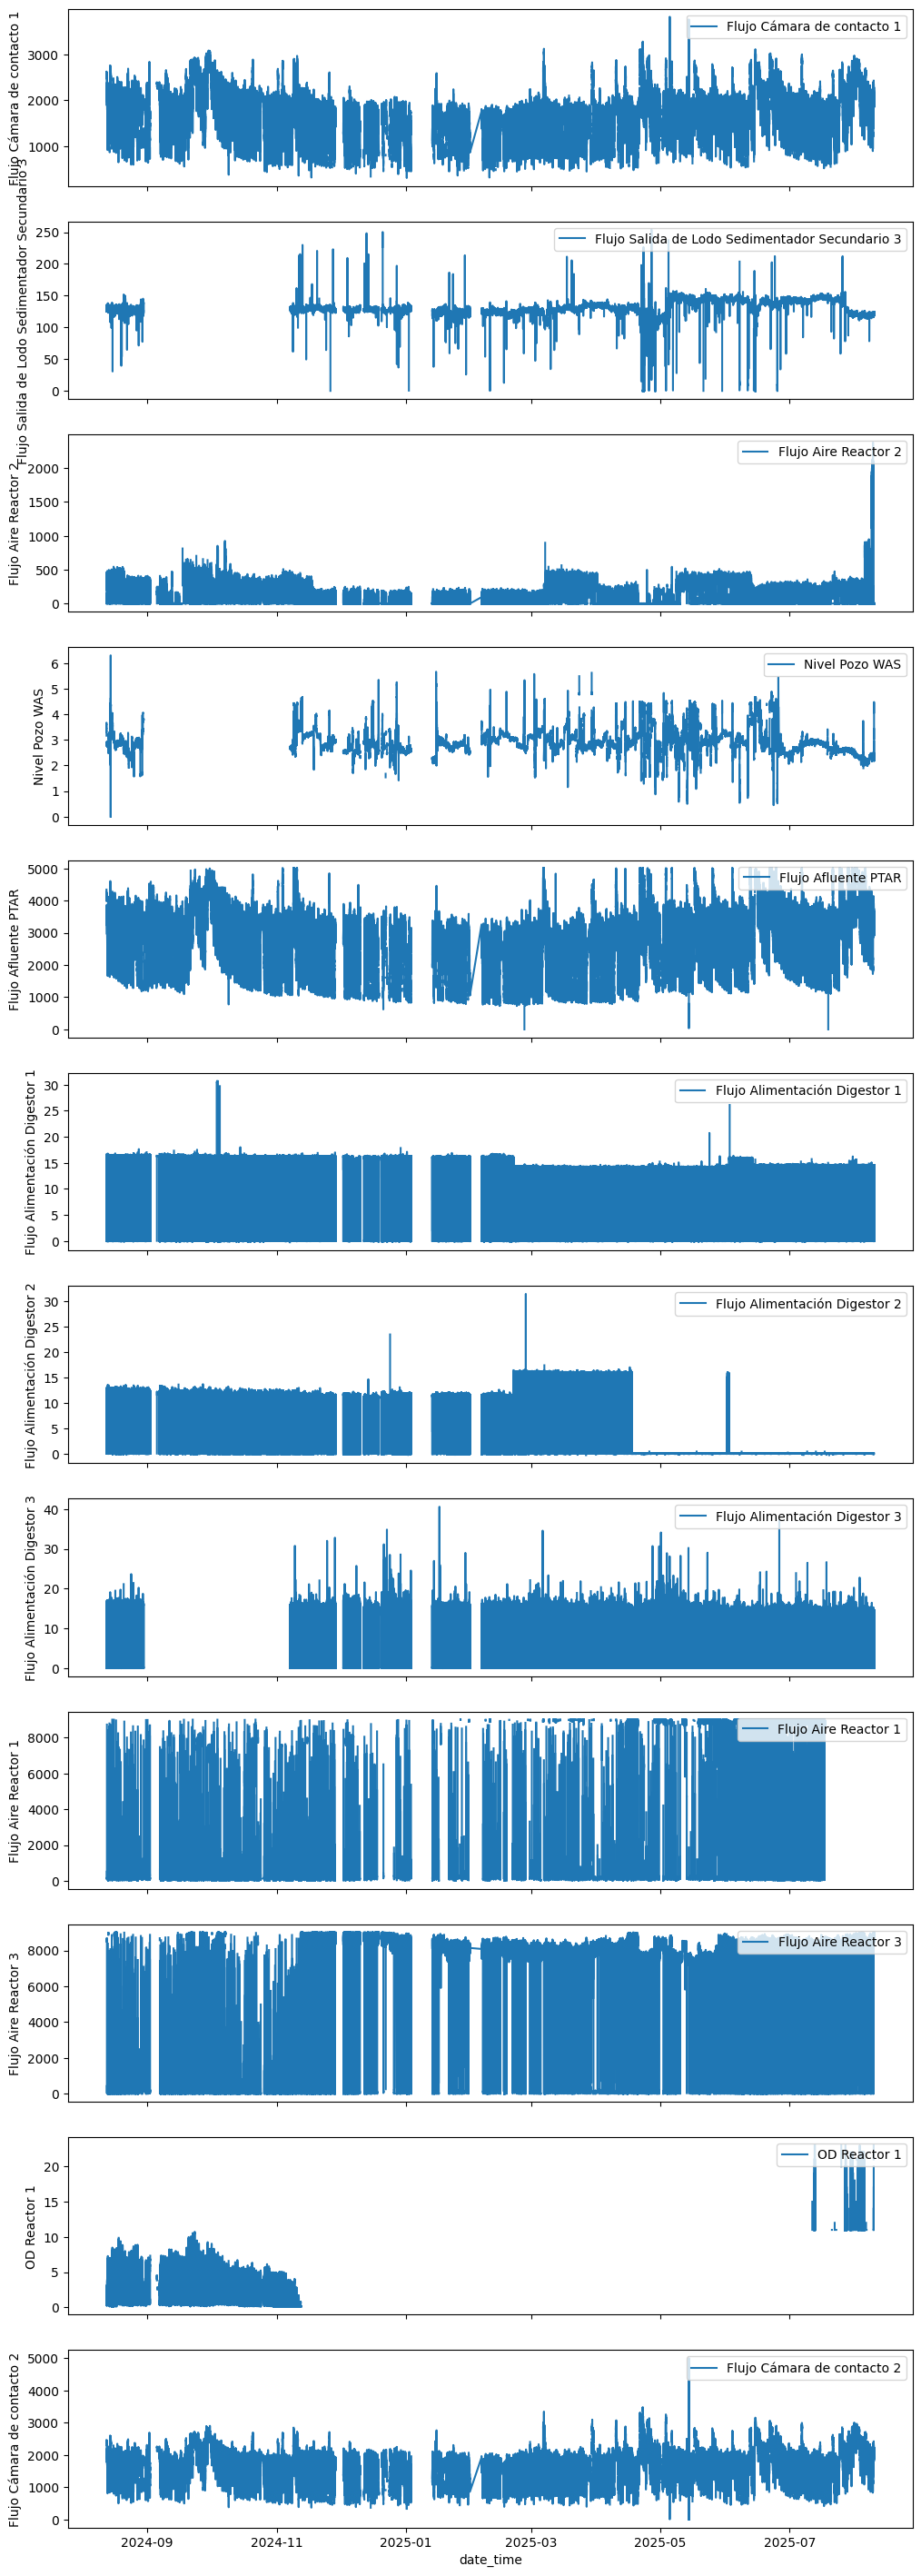

In [11]:
funciones.plot_all_timeseries(df_planta_2)

In [12]:
# Crear la carpeta 'df_procesados' si no existe
os.makedirs('df_procesados', exist_ok=True)

df_planta_2.to_csv('df_procesados/df_planta_2.csv', index=False)

# Lagunas de datos

In [14]:
num_cols = df_planta_2.select_dtypes(include=[np.number]).columns
l_periodo = []

for col in num_cols:
    
    data = funciones.periocidad_data(df_planta_2, col)

    l_periodo.append({
                "columna": col,
                "promedio_minutos": data["promedio_minutos"],
                "std_minutos": data["std_minutos"],
                "maximo_minutos": data["maximo"]
            })
    
df_periodo = pd.DataFrame(l_periodo)

df_periodo.head()

,columna,promedio_minutos,std_minutos,maximo_minutos
0,Flujo Cámara de contacto 1,1.261726,28.381092,14230.0
1,Flujo Salida de Lodo Sedimentador Secundario 3,1.629157,178.727134,99603.0
2,Flujo Aire Reactor 2,1.410360,29.962937,14229.0
3,Nivel Pozo WAS,1.629325,178.373773,99389.0
4,Flujo Afluente PTAR,1.231626,27.051241,14230.0
